In [1]:
##Algoritma Peningkatan DBSCAN dengan Pengujian n_cluster = 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [59]:
filelocation = 'C:/Users/User/Documents/Berkas Fikar/Skripsi Fikar/Database/data_dari_dbscan.csv'
data = pd.read_csv(filelocation)

In [60]:
data.head()

,No,Nama Sekolah,BP,Status,siswa_total,jumlah_guru,staf_total,jumlah_ruangan,daya_listrik,wilayah_total,skor_akreditasi,Lintang,Bujur,pca1,pca2,dbscan_kluster
0,1,UPT SPF SD INPRES BADDOKA,SD,Negeri,337,18,3,13,1300,2808,81,509153567,1195133502,1.628340,3.349251,0
1,2,UPT SPF SD INPRES BAKUNG 1,SD,Negeri,243,15,4,8,900,3000,84,5073361105,1195294071,1.781699,6.710388,0
2,3,UPT SPF SD INPRES BAKUNG 2,SD,Negeri,269,16,5,8,4400,2500,84,5079140801,119529189,1.373750,3.268771,0
3,4,UPT SPF SD INPRES DAYA,SD,Negeri,498,28,3,13,4640,1200,87,5112902708,119512008,2.638114,3.056547,0
4,5,UPT SPF SD INPRES KALANG TUBUNG 2,SD,Negeri,195,15,1,8,1300,1505,81,5080894528,119536749,0.434320,3.433142,0


In [73]:
fitur = ['pca1', 'pca2']
x = data.loc[:, fitur].values

In [81]:
dbscan_kmeans = KMeans(n_clusters=3, init = 'k-means++')
y_dbscan_kmeans = dbscan_kmeans.fit_predict(x)

In [82]:
y_dbscan_kmeans

array([0, 0, 0, ..., 0, 0, 1])

In [83]:
klaster_dbscan_kmeans = pd.DataFrame(data = y_dbscan_kmeans, columns = ['kmeans_klaster'])
klaster_dbscan_kmeans

,kmeans_klaster
0,0
1,0
2,0
3,0
4,0
...,...
9180,0
9181,0
9182,0
9183,0


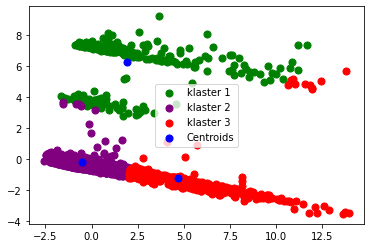

In [84]:
plt.scatter(x[y_dbscan_kmeans==0,0], x[y_dbscan_kmeans==0,1], s=50, c='green', label = 'klaster 1')
plt.scatter(x[y_dbscan_kmeans==1,0], x[y_dbscan_kmeans==1,1], s=50, c='purple', label = 'klaster 2')
plt.scatter(x[y_dbscan_kmeans==2,0], x[y_dbscan_kmeans==2,1], s=50, c='red', label = 'klaster 3')
plt.scatter(dbscan_kmeans.cluster_centers_[:, 0], dbscan_kmeans.cluster_centers_[:,1], s = 50, c = 'blue', label = 'Centroids')
plt.legend()
plt.show()

In [85]:
hasil = pd.concat([data, pd.DataFrame(klaster_dbscan_kmeans)], axis=1)
hasil.to_csv('data_hasil_peningkatan_dbscan_3clusterrr.csv', index = False)

In [86]:
from sklearn.metrics import silhouette_samples, silhouette_score
SI = silhouette_score(x, y_dbscan_kmeans)
print(SI)

0.7800457236035341


In [ ]:
Cohesion: a Separation: b Distance: d(i, j) Silhouette Score: S

INPUT DATA(x, y) INPUT CLUSTER(C)

CALCULATE COHESION a(k)
i ∈ C(k)
j ∈ C(k)
a(k) = MEAN d(i, j)

CALCULATE SEPARATION b(k)
i ∈ C(k)
j ∉ C(k)
b(k) = MIN d(i, j)

CALCULATE SILHOUETTE SCORE CLUSTER S(k)
S(k) = (b(k) – a(k)) / MAX(a(k), b(k))

CALCULATE SILHOUETTE SCORE S S = MEAN S(k)
